In [1]:
import pandas as pd                  # For dataframes and data manipulation
import numpy as np

data = pd.read_csv('data_df.csv')


In [2]:
df = data.copy()
df

,year_month,country,county,uid,uid_code,uidear,county_code,adolescent_10_24_receiving_fp_new,adolescent_10_24_receiving_fp_revisits,adults_25+_receiving_fp_services_new,...,iud_stock_dispensed,iud_stock_at_hand,iud_stock_requested,iud_stock_received,eligible_fp,"core_health_workforce_per_10,000population",Demand_Satisfied_by_Modern_Methods (%),"mCPR (Married Women, %)","Teenage Pregnancy Rate (15-19, %)","Total Unmet Need (Married Women, %)"
0,202412,Kenya,Kwale,N7YETT3A9r1,202412_N7YETT3A9r1,2024_N7YETT3A9r1,KE_County_2,821,2065,877,...,0,0,0,0,248890.26,NaN,NaN,NaN,NaN,NaN
1,202412,Kenya,Migori,fVra3Pwta0Q,202412_fVra3Pwta0Q,2024_fVra3Pwta0Q,KE_County_44,6551,5177,1602,...,0,0,0,0,372197.00,NaN,NaN,NaN,NaN,NaN
2,202412,Kenya,Muranga,ahwTMNAJvrL,202412_ahwTMNAJvrL,2024_ahwTMNAJvrL,KE_County_21,612,1179,997,...,0,0,0,0,308647.00,NaN,NaN,NaN,NaN,NaN
3,202412,Kenya,Kericho,ihZsJ8alvtb,202412_ihZsJ8alvtb,2024_ihZsJ8alvtb,KE_County_35,1007,1538,1675,...,0,0,0,0,306614.00,NaN,NaN,NaN,NaN,NaN
4,202412,Kenya,Embu,PFu8alU2KWG,202412_PFu8alU2KWG,2024_PFu8alU2KWG,KE_County_14,331,996,378,...,0,0,0,0,196151.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,201401,Kenya,Nakuru,ob6SxuRcqU4,201401_ob6SxuRcqU4,2014_ob6SxuRcqU4,KE_County_32,0,0,0,...,40,677,262,33,404645.00,NaN,NaN,NaN,NaN,NaN
6200,201401,Kenya,Isiolo,bzOfj0iwfDH,201401_bzOfj0iwfDH,2014_bzOfj0iwfDH,KE_County_11,0,0,0,...,0,0,0,0,36982.00,NaN,NaN,NaN,NaN,NaN
6201,201401,Kenya,Migori,fVra3Pwta0Q,201401_fVra3Pwta0Q,2014_fVra3Pwta0Q,KE_County_44,0,0,0,...,17,271,1500,30,204480.00,NaN,NaN,NaN,NaN,NaN
6202,201401,Kenya,Wajir,CeLsrJOH0g9,201401_CeLsrJOH0g9,2014_CeLsrJOH0g9,KE_County_8,0,0,0,...,0,0,0,0,112405.00,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['year_month', 'country', 'county', 'uid', 'uid_code', 'uidear',
       'county_code', 'adolescent_10_24_receiving_fp_new',
       'adolescent_10_24_receiving_fp_revisits',
       'adults_25+_receiving_fp_services_new',
       'adults_25+_receiving_fp_services_revisits', 'condoms_new',
       'condoms_revisits', 'traditional_new', 'pills_new', 'pills_revisits',
       'traditional_revisits', 'injectable_new', 'injectable_revisits',
       'traditional', 'implants_new', 'implants_revisits', 'iucd_new',
       'iucd_revisits', 'surgical_new', 'surgical_revisits', 'condoms',
       'pills', 'injectables', 'implants', 'iucd', 'surgical',
       'total_modern_fp', 'total_cyp', 'periodid', 'periodname',
       'pills_combined_oral_contraceptive_stock_losses',
       'pills_combined_oral_contraceptive_stock_dispensed',
       'pills_combined_oral_contraceptive_stock_at_hand',
       'pills_combined_oral_contraceptive_stock_requested',
       'pills_combined_oral_contraceptive_stock_rece

In [4]:
df['mCPR (Married Women, %)'].value_counts()

,count
"mCPR (Married Women, %)",
0.7,1
4.8,1
65.8,1
67.4,1
71.0,1
69.0,1
26.5,1
30.2,1
41.0,1


In [5]:
print(df['mCPR (Married Women, %)'].isna().sum())

6157


In [6]:
df.columns[df.isna().all()]

Index(['core_health_workforce_per_10,000population'], dtype='object')

In [7]:
df['core_health_workforce_per_10,000population'].value_counts()

,count
"core_health_workforce_per_10,000population",


In [8]:
#Feature engineering
#Dropping columns with only Nan values
df = df.drop(columns=df.columns[df.isna().all()])

In [9]:
df.columns[df.isna().all()]

Index([], dtype='object')

In [10]:
from os import replace
#Dropping irrelevant columns
df.drop(['country','uid_code','uidear'], axis=1, inplace=True)

In [11]:
#Extracting county code from county code column
df['county_code'] = df['county_code'].str.extract(r'KE_County_(\d+)').astype(int)

In [12]:
df

,year_month,county,uid,county_code,adolescent_10_24_receiving_fp_new,adolescent_10_24_receiving_fp_revisits,adults_25+_receiving_fp_services_new,adults_25+_receiving_fp_services_revisits,condoms_new,condoms_revisits,...,iud_stock_losses,iud_stock_dispensed,iud_stock_at_hand,iud_stock_requested,iud_stock_received,eligible_fp,Demand_Satisfied_by_Modern_Methods (%),"mCPR (Married Women, %)","Teenage Pregnancy Rate (15-19, %)","Total Unmet Need (Married Women, %)"
0,202412,Kwale,N7YETT3A9r1,2,821,2065,877,4726,127,99,...,0,0,0,0,0,248890.26,NaN,NaN,NaN,NaN
1,202412,Migori,fVra3Pwta0Q,44,6551,5177,1602,5577,731,488,...,0,0,0,0,0,372197.00,NaN,NaN,NaN,NaN
2,202412,Muranga,ahwTMNAJvrL,21,612,1179,997,4373,174,402,...,0,0,0,0,0,308647.00,NaN,NaN,NaN,NaN
3,202412,Kericho,ihZsJ8alvtb,35,1007,1538,1675,2138,226,80,...,0,0,0,0,0,306614.00,NaN,NaN,NaN,NaN
4,202412,Embu,PFu8alU2KWG,14,331,996,378,3938,96,68,...,0,0,0,0,0,196151.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,201401,Nakuru,ob6SxuRcqU4,32,0,0,0,0,706,1122,...,0,40,677,262,33,404645.00,NaN,NaN,NaN,NaN
6200,201401,Isiolo,bzOfj0iwfDH,11,0,0,0,0,167,89,...,0,0,0,0,0,36982.00,NaN,NaN,NaN,NaN
6201,201401,Migori,fVra3Pwta0Q,44,0,0,0,0,1217,1313,...,0,17,271,1500,30,204480.00,NaN,NaN,NaN,NaN
6202,201401,Wajir,CeLsrJOH0g9,8,0,0,0,0,264,128,...,0,0,0,0,0,112405.00,NaN,NaN,NaN,NaN


In [13]:
# convert it to a string
df['year_month'] = df['year_month'].astype(str)

# Extract year and month
df['year'] = df['year_month'].str[:4].astype(int)
df['month'] = df['year_month'].str[4:].astype(int)
df

,year_month,county,uid,county_code,adolescent_10_24_receiving_fp_new,adolescent_10_24_receiving_fp_revisits,adults_25+_receiving_fp_services_new,adults_25+_receiving_fp_services_revisits,condoms_new,condoms_revisits,...,iud_stock_at_hand,iud_stock_requested,iud_stock_received,eligible_fp,Demand_Satisfied_by_Modern_Methods (%),"mCPR (Married Women, %)","Teenage Pregnancy Rate (15-19, %)","Total Unmet Need (Married Women, %)",year,month
0,202412,Kwale,N7YETT3A9r1,2,821,2065,877,4726,127,99,...,0,0,0,248890.26,NaN,NaN,NaN,NaN,2024,12
1,202412,Migori,fVra3Pwta0Q,44,6551,5177,1602,5577,731,488,...,0,0,0,372197.00,NaN,NaN,NaN,NaN,2024,12
2,202412,Muranga,ahwTMNAJvrL,21,612,1179,997,4373,174,402,...,0,0,0,308647.00,NaN,NaN,NaN,NaN,2024,12
3,202412,Kericho,ihZsJ8alvtb,35,1007,1538,1675,2138,226,80,...,0,0,0,306614.00,NaN,NaN,NaN,NaN,2024,12
4,202412,Embu,PFu8alU2KWG,14,331,996,378,3938,96,68,...,0,0,0,196151.00,NaN,NaN,NaN,NaN,2024,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,201401,Nakuru,ob6SxuRcqU4,32,0,0,0,0,706,1122,...,677,262,33,404645.00,NaN,NaN,NaN,NaN,2014,1
6200,201401,Isiolo,bzOfj0iwfDH,11,0,0,0,0,167,89,...,0,0,0,36982.00,NaN,NaN,NaN,NaN,2014,1
6201,201401,Migori,fVra3Pwta0Q,44,0,0,0,0,1217,1313,...,271,1500,30,204480.00,NaN,NaN,NaN,NaN,2014,1
6202,201401,Wajir,CeLsrJOH0g9,8,0,0,0,0,264,128,...,0,0,0,112405.00,NaN,NaN,NaN,NaN,2014,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 80 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   year_month                                         6204 non-null   object 
 1   county                                             6204 non-null   object 
 2   uid                                                6204 non-null   object 
 3   county_code                                        6204 non-null   int64  
 4   adolescent_10_24_receiving_fp_new                  6204 non-null   int64  
 5   adolescent_10_24_receiving_fp_revisits             6204 non-null   int64  
 6   adults_25+_receiving_fp_services_new               6204 non-null   int64  
 7   adults_25+_receiving_fp_services_revisits          6204 non-null   int64  
 8   condoms_new                                        6204 non-null   int64  
 9   condoms_

In [15]:
(df.isna().sum() / len(df)) * 100

,0
year_month,0.000000
county,0.000000
uid,0.000000
county_code,0.000000
adolescent_10_24_receiving_fp_new,0.000000
...,...
"mCPR (Married Women, %)",99.242424
"Teenage Pregnancy Rate (15-19, %)",99.242424
"Total Unmet Need (Married Women, %)",99.242424
year,0.000000


In [16]:
# filling the NaN values with 0
df.fillna(0, inplace=True)

In [17]:
df['total_new_fp_users'] = (
    df['adolescent_10_24_receiving_fp_new'] +
    df['adults_25+_receiving_fp_services_new']
)

df['fp_demand_ratio'] = df['total_new_fp_users'] / df['eligible_fp']
df['revisit_to_new_ratio'] = (
    df['adolescent_10_24_receiving_fp_revisits'] /
    (df['adolescent_10_24_receiving_fp_new'] + 1)
)

In [18]:
df

,year_month,county,uid,county_code,adolescent_10_24_receiving_fp_new,adolescent_10_24_receiving_fp_revisits,adults_25+_receiving_fp_services_new,adults_25+_receiving_fp_services_revisits,condoms_new,condoms_revisits,...,eligible_fp,Demand_Satisfied_by_Modern_Methods (%),"mCPR (Married Women, %)","Teenage Pregnancy Rate (15-19, %)","Total Unmet Need (Married Women, %)",year,month,total_new_fp_users,fp_demand_ratio,revisit_to_new_ratio
0,202412,Kwale,N7YETT3A9r1,2,821,2065,877,4726,127,99,...,248890.26,0.0,0.0,0.0,0.0,2024,12,1698,0.006822,2.512165
1,202412,Migori,fVra3Pwta0Q,44,6551,5177,1602,5577,731,488,...,372197.00,0.0,0.0,0.0,0.0,2024,12,8153,0.021905,0.790140
2,202412,Muranga,ahwTMNAJvrL,21,612,1179,997,4373,174,402,...,308647.00,0.0,0.0,0.0,0.0,2024,12,1609,0.005213,1.923328
3,202412,Kericho,ihZsJ8alvtb,35,1007,1538,1675,2138,226,80,...,306614.00,0.0,0.0,0.0,0.0,2024,12,2682,0.008747,1.525794
4,202412,Embu,PFu8alU2KWG,14,331,996,378,3938,96,68,...,196151.00,0.0,0.0,0.0,0.0,2024,12,709,0.003615,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,201401,Nakuru,ob6SxuRcqU4,32,0,0,0,0,706,1122,...,404645.00,0.0,0.0,0.0,0.0,2014,1,0,0.000000,0.000000
6200,201401,Isiolo,bzOfj0iwfDH,11,0,0,0,0,167,89,...,36982.00,0.0,0.0,0.0,0.0,2014,1,0,0.000000,0.000000
6201,201401,Migori,fVra3Pwta0Q,44,0,0,0,0,1217,1313,...,204480.00,0.0,0.0,0.0,0.0,2014,1,0,0.000000,0.000000
6202,201401,Wajir,CeLsrJOH0g9,8,0,0,0,0,264,128,...,112405.00,0.0,0.0,0.0,0.0,2014,1,0,0.000000,0.000000


Baseline model

In [19]:
#Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
# Drop non-predictive columns
drop_cols = ['county', 'uid', 'fp_demand_ratio']

X = df.drop(columns=drop_cols)
y = df['fp_demand_ratio']

# Identify feature types
categorical_cols = ['county_code']
numeric_cols = X.select_dtypes(include='number').columns.difference(categorical_cols).tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])
# Linear Regression pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model
linear_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Baseline")
print("RMSE:", rmse)
print("R² Score:", r2)


Linear Regression Baseline
RMSE: 2.746180925874058e-06
R² Score: 0.8896816077899221


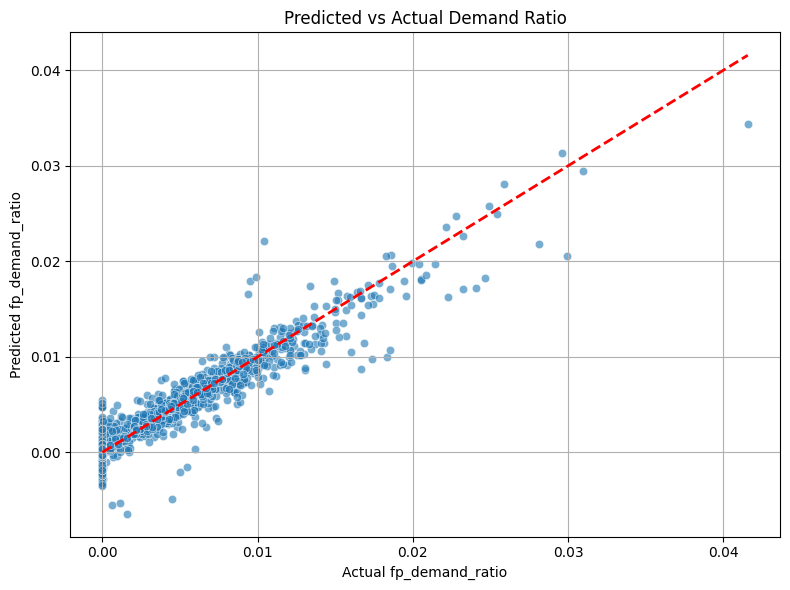

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already got y_test and y_pred from your model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual fp_demand_ratio")
plt.ylabel("Predicted fp_demand_ratio")
plt.title("Predicted vs Actual Demand Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("RMSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest:
RMSE: 2.5447332724833505e-07
R²: 0.9897774075779621


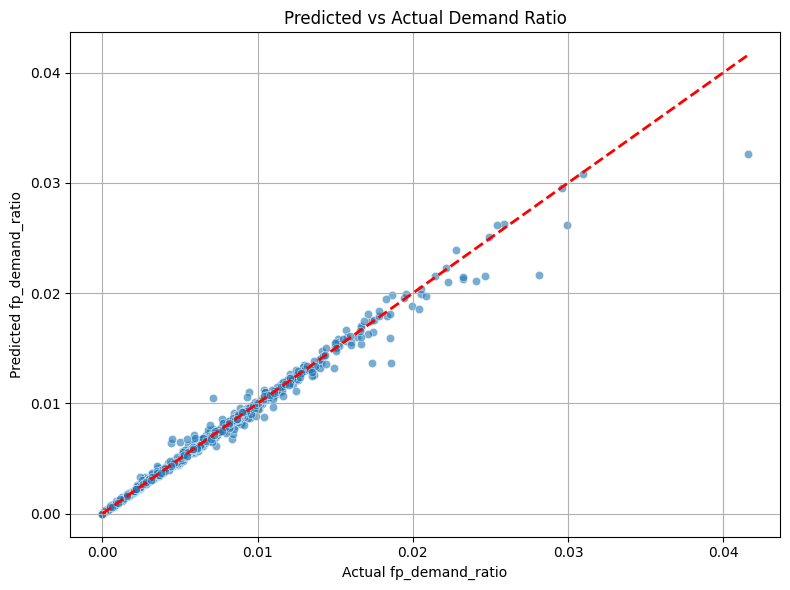

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual fp_demand_ratio")
plt.ylabel("Predicted fp_demand_ratio")
plt.title("Predicted vs Actual Demand Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost:")
print("RMSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBoost:
RMSE: 2.0933037472854878e-07
R²: 0.991590870738629


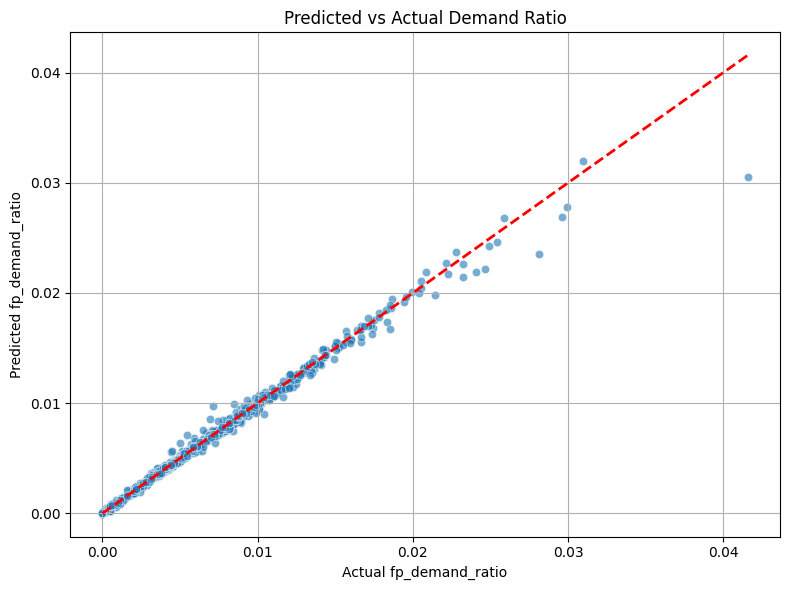

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual fp_demand_ratio")
plt.ylabel("Predicted fp_demand_ratio")
plt.title("Predicted vs Actual Demand Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
from lightgbm import LGBMRegressor

lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM:")
print("RMSE:", mean_squared_error(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11622
[LightGBM] [Info] Number of data points in the train set: 4963, number of used features: 114
[LightGBM] [Info] Start training from score 0.005325
LightGBM:
RMSE: 1.7803445704486443e-07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
